In [1]:
import pandas as pd
import numpy as np
import os
import sys
data_dir = os.getcwd()+"/log_data/"
sys.argv = ["file","train.csv", "test.csv", "param_a.txt" ,"outputfile.csv", "weightfile.csv"]

In [2]:

def hotencode_train(data):
    train = pd.DataFrame()
    parents = pd.get_dummies(data[0], prefix="parents")
    has_nurs = pd.get_dummies(data[1], prefix="has_nurs")
    form = pd.get_dummies(data[2], prefix="form")
    children = pd.get_dummies(data[3], prefix="children")
    housing = pd.get_dummies(data[4], prefix="housing")
    finance = pd.get_dummies(data[5], prefix="finance")
    social = pd.get_dummies(data[6], prefix="social")
    health = pd.get_dummies(data[7], prefix="health")
    classDistribution = pd.get_dummies(data[8], prefix="class")
    train = pd.concat([parents, has_nurs, form, children, housing,
                    finance, social, health, classDistribution], axis=1)
    cols = ['parents_usual', 'parents_pretentious', 'parents_great_pret', 'has_nurs_proper', 'has_nurs_less_proper', 'has_nurs_improper',
            'has_nurs_critical', 'has_nurs_very_crit',
            'form_complete', 'form_completed', 'form_incomplete', 'form_foster',
            'children_1', 'children_2', 'children_3', 'children_more',
            'housing_convenient', 'housing_less_conv', 'housing_critical',
            'finance_convenient', 'finance_inconv',
            'social_nonprob', 'social_slightly_prob', 'social_problematic',
            'health_recommended', 'health_priority', 'health_not_recom',
            'class_not_recom', 'class_recommend', 'class_very_recom', 'class_priority', 'class_spec_prior']

    return train[pd.Index(cols)]

def hotencode_test(data):
    train = pd.DataFrame()
    parents = pd.get_dummies(data[0], prefix="parents")
    has_nurs = pd.get_dummies(data[1], prefix="has_nurs")
    form = pd.get_dummies(data[2], prefix="form")
    children = pd.get_dummies(data[3], prefix="children")
    housing = pd.get_dummies(data[4], prefix="housing")
    finance = pd.get_dummies(data[5], prefix="finance")
    social = pd.get_dummies(data[6], prefix="social")
    health = pd.get_dummies(data[7], prefix="health")
    train = pd.concat([parents, has_nurs, form, children, housing,
                    finance, social, health], axis=1)
    cols = ['parents_usual', 'parents_pretentious', 'parents_great_pret', 'has_nurs_proper', 'has_nurs_less_proper', 'has_nurs_improper',
            'has_nurs_critical', 'has_nurs_very_crit',
            'form_complete', 'form_completed', 'form_incomplete', 'form_foster',
            'children_1', 'children_2', 'children_3', 'children_more',
            'housing_convenient', 'housing_less_conv', 'housing_critical',
            'finance_convenient', 'finance_inconv',
            'social_nonprob', 'social_slightly_prob', 'social_problematic',
            'health_recommended', 'health_priority', 'health_not_recom']
    return train[pd.Index(cols)]

In [12]:

train_data = pd.read_csv(data_dir+sys.argv[1], header=None)
test_data = pd.read_csv(data_dir+sys.argv[2], header=None)
with open(data_dir+sys.argv[3],"r") as f:
    params = np.array(f.read().replace(",","\n")[:-1].split("\n")).astype(np.float)   
    print(params)
train = hotencode_train(train_data)
test = hotencode_test(test_data)
classes = train.iloc[:, -5:].values
features = train.iloc[:, :-5].values
features = np.c_[np.ones(len(train)), features]
X_train = np.copy(features[:, :])
Y_train = np.copy(classes[:, :])
# X_train[:,21]=0
# features = test.iloc[:, :].values
# features = np.c_[np.ones(len(test)), features]
# X_test = features[:, :]
# X_test[:,21]=0
print(X_train.shape, Y_train.shape,params)

[3.e+00 1.e-03 5.e-02 1.e-02 1.e+04]
(6000, 28) (6000, 5) [3.e+00 1.e-03 5.e-02 1.e-02 1.e+04]


In [13]:

def gradient(X,Y,W):
    XW = np.exp(np.matmul(X, W))
    denom = np.sum(XW, axis=1)
    Y_predict = np.divide(XW, denom.reshape(X.shape[0], 1))
    return np.matmul(X.transpose(), Y - Y_predict)/X.shape[0]
def cost(W,X,Y):
    XW = np.exp(np.matmul(X,W))
    logTerm = np.log(np.sum(XW,axis=1))
    weightedTerm = np.sum(np.multiply(np.matmul(Y,W.T),X),axis=1)
    error = np.sum(logTerm-weightedTerm)/X.shape[0]
    return error

In [52]:
def confusionMatrix(w_intial,X_test,Y_test):
    WmulX = np.exp(np.matmul(X_test, w_initial))
    denom = np.sum(WmulX, axis=1)
    Y_predict = np.divide(WmulX, denom.reshape(len(X_test), 1))
    b = np.zeros_like(Y_predict)
    b[np.arange(len(Y_predict)), Y_predict.argmax(1)] = 1
    Y_predict = b
    accuracy = np.trace(np.matmul(Y_predict,Y_test.T))/(600)
#     print(("   accuracy="+str(accuracy*100)+"%"),end="\r",)
    Y_predict[:,0] =1*Y_predict[:,0]
    Y_predict[:,1] =2*Y_predict[:,1]
    Y_predict[:,2] =3*Y_predict[:,2]
    Y_predict[:,3] =4*Y_predict[:,3]
    Y_predict[:,4] =5*Y_predict[:,4]
    Y_predict = np.sum(Y_predict,axis=1).tolist()
    Y_test[:,0] =1*Y_test[:,0]
    Y_test[:,1] =2*Y_test[:,1]
    Y_test[:,2] =3*Y_test[:,2]
    Y_test[:,3] =4*Y_test[:,3]
    Y_test[:,4] =5*Y_test[:,4]
    Y_test = np.sum(Y_test,axis=1).tolist()
    mat = np.zeros((5,5))
    for i in range(0,len(Y_predict)):
        mat[int(Y_predict[i])-1][Y_test[i]-1]=mat[int(Y_predict[i])-1][Y_test[i]-1]+1
    print("confusion matrix:-\n",mat)
    f1Score = []
    for i in range(len(mat)):
    #     print(mat[i,i])
    #     print(np.sum(mat[i,:]))
    #     print(np.sum(mat[:,i]))
        precision = mat[i,i]/np.sum(mat[:,i])
        recall = mat[i,i]/np.sum(mat[i,:])
    #     print(precision,recall,"\n\n")
        f1Score.append([mat[i,i],np.sum(mat[:,i])-mat[i,i],np.sum(mat[i,:])-mat[i,i],precision,recall,2*precision*recall/(precision+recall)*100])  
    F1Score = pd.DataFrame([],columns=["TP","FP","FN","precision","recall","F1_Score"])
    F1Score.loc["class_not_recom"] = f1Score[0]
    F1Score.loc["class_recommend"] = f1Score[1]
    F1Score.loc["class_very_recom"] = f1Score[2]
    F1Score.loc["class_priority"] = f1Score[3]
    F1Score.loc["class_spec_prior"] = f1Score[4]
    print(F1Score)
    micro_average_precision = np.sum(F1Score.iloc[:,0].values)/(np.sum(F1Score.iloc[:,0].values)+np.sum(F1Score.iloc[:,1].values))
    micro_average_recall = np.sum(F1Score.iloc[:,0].values)/(np.sum(F1Score.iloc[:,0].values)+np.sum(F1Score.iloc[:,2].values))
    micro_F1_score = 2*micro_average_precision*micro_average_recall/(micro_average_precision+micro_average_recall)
    print("micro_F1_score= ",100*micro_F1_score)
    macro_average_precision = np.sum(F1Score.iloc[:,3].values)/2
    macro_average_recall = np.sum(F1Score.iloc[:,4].values)/2
    macro_F1_score =2* macro_average_precision*macro_average_recall/(macro_average_precision+macro_average_recall)
    print("macro_F1_score= ",100*macro_F1_score)

In [53]:
eta = [ 0.001, 0.01, .5, .1, 1, 5,10,100]
# eta = [0.01]

In [54]:
costList = []
# X_train = np.copy(features[:, :])
# Y_train = np.copy(classes[:, :])
for i,lr in enumerate(eta):
    X_train = np.copy(features[:, :])
    Y_train = np.copy(classes[:, :])
    costAr = []
    costAr.append(0)
    w_initial = np.zeros(28*5).reshape(28, 5)
    for j in range(1, 10000):
        grad = gradient(X_train[:5400,:],Y_train[:5400,:],w_initial)
        w_temp = w_initial+(lr/np.sqrt(j))*grad 
        c = cost(w_initial,X_train,Y_train)
        print((j,c), end="\r", flush=True)
        costAr.append(c)
        if(costAr[j-1]-costAr[j]<.00001 and j>20):
            print(costAr[j],costAr[j-1])
            break
        w_initial = w_temp    
    costList.append(costAr[1:])    
    print("For learning rate:- ",lr)
    confusionMatrix(w_initial,X_train[5400:,:],Y_train[5400:,:])
    print("\n\n\n")

1.5571093642637177 1.5571193641008758
For learning rate:-  0.001
confusion matrix:-
 [[186.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.  15. 213. 100.]
 [  0.   0.   0.   2.  84.]]
                     TP     FP     FN  precision    recall    F1_Score
class_not_recom   186.0    0.0    0.0   1.000000  1.000000  100.000000
class_recommend     0.0    0.0    0.0        NaN       NaN         NaN
class_very_recom    0.0   15.0    0.0   0.000000       NaN         NaN
class_priority    213.0    2.0  115.0   0.990698  0.649390   78.453039
class_spec_prior   84.0  100.0    2.0   0.456522  0.976744   62.222222
micro_F1_score=  80.5
macro_F1_score=  nan






file:31: RuntimeWarning: invalid value encountered in double_scalars
file:32: RuntimeWarning: invalid value encountered in double_scalars


For learning rate:-  0.01)
confusion matrix:-
 [[186.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.  15. 210.  57.]
 [  0.   0.   0.   5. 127.]]
                     TP    FP    FN  precision    recall    F1_Score
class_not_recom   186.0   0.0   0.0   1.000000  1.000000  100.000000
class_recommend     0.0   0.0   0.0        NaN       NaN         NaN
class_very_recom    0.0  15.0   0.0   0.000000       NaN         NaN
class_priority    210.0   5.0  72.0   0.976744  0.744681   84.507042
class_spec_prior  127.0  57.0   5.0   0.690217  0.962121   80.379747
micro_F1_score=  87.16666666666667
macro_F1_score=  nan




0.3089951508505309 0.30900514798153894
For learning rate:-  0.5
confusion matrix:-
 [[186.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.  15. 197.  18.]
 [  0.   0.   0.  18. 166.]]
                     TP    FP    FN  precision    recall    F1_Score
class_not_recom   186.0   0.0   0.0   1.0000

In [43]:
fr = costList

In [48]:
costList

[[1.608880395079712,
  1.6084865701093956,
  1.608165250405975,
  1.607887148997017,
  1.607638539774398,
  1.607411700047183,
  1.6072017791294864,
  1.6070054957914621,
  1.6068205084667553,
  1.6066450770925325,
  1.6064778668762292,
  1.6063178273762775,
  1.6061641143362408,
  1.6060160371390582,
  1.6058730223129256,
  1.6057345874757745,
  1.6056003222866262,
  1.6054698742303855,
  1.6053429378169297,
  1.6052192462428814,
  1.605098564862803,
  1.6049806860119549,
  1.6048654248536514,
  1.6047526160138144,
  1.6046421108276896,
  1.60453377506792,
  1.6044274870549506,
  1.6043231360739658,
  1.6042206210396883,
  1.604119849363205,
  1.6040207359846674,
  1.6039232025431327,
  1.6038271766604928,
  1.6037325913209104,
  1.6036393843306278,
  1.6035474978457924,
  1.603456877958104,
  1.6033674743298725,
  1.6032792398714573,
  1.6031921304552337,
  1.6031061046611481,
  1.603021123549706,
  1.6029371504588574,
  1.6028541508217764,
  1.6027720920029707,
  1.6026909431505092,

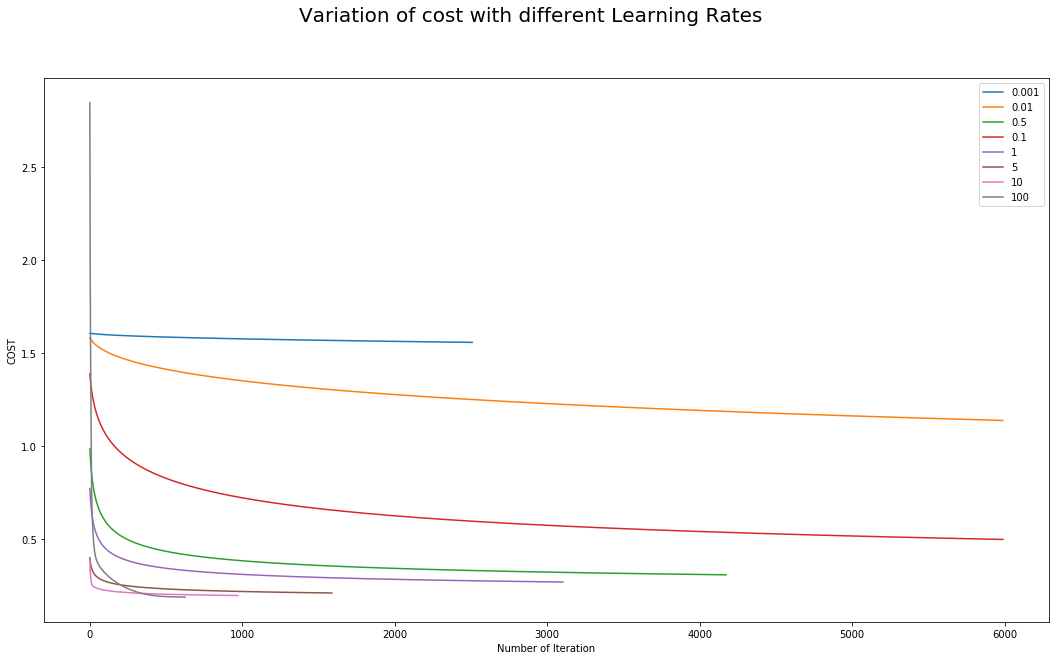

In [63]:
# import matplotlib.pyplot as plt
# # 
# plt.plot(ranimport matplotlib.pyplot as plt
# plt.plot(range(0, len(batch1Error)),batch1Error)
# plt.show()ge(0,len(costList[1]),costList[1])
# plt.show()   
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
for i,c in enumerate(costList):
    plt.plot(range(0, len(c[10:6000])),c[10:6000])
plt.gca().legend((eta))   
plt.xlabel("Number of Iteration")
plt.ylabel("COST")
plt.suptitle("Variation of cost with different Learning Rates",fontsize=20)
plt.show()

In [44]:
batches = [1,10,20,30]

In [55]:
costList2 = []
for batch in batches:
    
    X_train = np.copy(features[:5400, :])
    Y_train = np.copy(classes[:5400, :])
    X_test = np.copy(features[5400:, :])
    Y_test = np.copy(classes[5400:, :])
    w_initial = np.zeros(28*5).reshape(28, 5)
    costAr = []
    costAr.append(50)
    k = batch
    l = X_train.shape[0]
    learningRate = 0.5
    for j in range(0, 10000):
        for i in range(0,int(k)):    
            startIndex = int((l/k)*i)
            endIndex = int((l/k)*(i+1))    
            grad  = gradient(X_train[startIndex:endIndex,:] , Y_train[startIndex:endIndex,:], w_initial)
            w_initial = w_initial+learningRate*grad 
        c = cost(w_initial,X_train,Y_train)
#         print((j,c), end="\r", flush=True)
        costAr.append(c)
#         if(costAr[j-1]-costAr[j]<.00001 and j>20):
#             print(costAr[j],costAr[j-1])
#             break
    costList2.append(costAr)    
    confusionMatrix(w_initial,X_test,Y_test)
    

confusion matrix:-
 [[186.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.  10.   2.   0.]
 [  0.   0.   5. 193.  19.]
 [  0.   0.   0.  20. 165.]]
                     TP    FP    FN  precision    recall    F1_Score
class_not_recom   186.0   0.0   0.0   1.000000  1.000000  100.000000
class_recommend     0.0   0.0   0.0        NaN       NaN         NaN
class_very_recom   10.0   5.0   2.0   0.666667  0.833333   74.074074
class_priority    193.0  22.0  24.0   0.897674  0.889401   89.351852
class_spec_prior  165.0  19.0  20.0   0.896739  0.891892   89.430894
micro_F1_score=  92.33333333333333
macro_F1_score=  nan


file:31: RuntimeWarning: invalid value encountered in double_scalars
file:32: RuntimeWarning: invalid value encountered in double_scalars


confusion matrix:-
 [[186.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.  11.   4.   0.]
 [  0.   0.   4. 191.  19.]
 [  0.   0.   0.  20. 165.]]
                     TP    FP    FN  precision    recall    F1_Score
class_not_recom   186.0   0.0   0.0   1.000000  1.000000  100.000000
class_recommend     0.0   0.0   0.0        NaN       NaN         NaN
class_very_recom   11.0   4.0   4.0   0.733333  0.733333   73.333333
class_priority    191.0  24.0  23.0   0.888372  0.892523   89.044289
class_spec_prior  165.0  19.0  20.0   0.896739  0.891892   89.430894
micro_F1_score=  92.16666666666666
macro_F1_score=  nan
confusion matrix:-
 [[186.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.  11.   4.   0.]
 [  0.   0.   4. 191.  19.]
 [  0.   0.   0.  20. 165.]]
                     TP    FP    FN  precision    recall    F1_Score
class_not_recom   186.0   0.0   0.0   1.000000  1.000000  100.000000
class_recommend     0.0   0.0   0.0        NaN       NaN         NaN
c

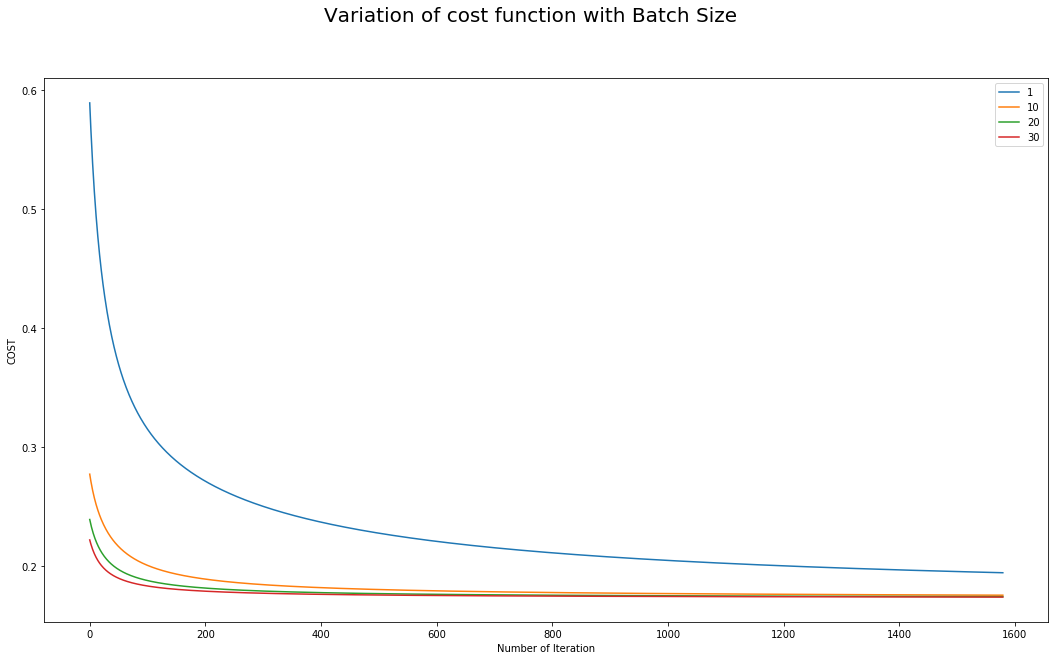

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
for i,c in enumerate(costList2):
    plt.plot(range(0, len(c[20:1600])),c[20:1600])
plt.gca().legend((batches))    
plt.xlabel("Number of Iteration")
plt.ylabel("COST")
plt.suptitle("Variation of cost function with Batch Size",fontsize=20)
plt.show()

In [108]:
train_data = pd.read_csv(data_dir+sys.argv[1], header=None)
train = hotencode_train(train_data)
classes = train.iloc[:, -5:].values
features = train.iloc[:, :-5].values
features = np.c_[np.ones(len(train)), features]
X_train = features[:, :]
Y_train = classes[:, :]
X_test = features[:,:]
Y_test = classes[:,:]
print(X_train.shape, Y_train.shape,X_test.shape,Y_test.shape)

(6000, 28) (6000, 5) (6000, 28) (6000, 5)


In [109]:
w_initial = np.zeros(28*5).reshape(28, 5)
costAr = []
costAr.append(0)
lr = 0.5
for j in range(1, 10000):
    grad = gradient(X_train,Y_train,w_initial)
    w_initial = w_initial+(lr/np.sqrt(j))*grad 
    c = cost(w_initial,X_train,Y_train)
    print((j,c), end="\r", flush=True)
    costAr.append(c)
    if(abs(costAr[j-1]-costAr[j])<.000001 and j>1):
        break
print(j)

99999, 0.2767591888091146))


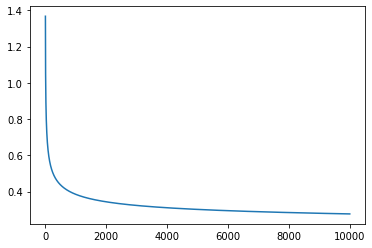

In [111]:
import matplotlib.pyplot as plt
plt.plot(range(0, len(costAr[1:])),costAr[1:])
plt.show()

In [112]:
WmulX = np.exp(np.matmul(X_test, w_initial))
denom = np.sum(WmulX, axis=1)
Y_predict = np.divide(WmulX, denom.reshape(len(X_test), 1))
b = np.zeros_like(Y_predict)
b[np.arange(len(Y_predict)), Y_predict.argmax(1)] = 1
Y_predict = b
accuracy = np.trace(np.matmul(Y_predict,Y_test.T))/(600)
print(("   accuracy="+str(accuracy*100)+"%"),end="\r",)

In [113]:
Y = Y_predict
Y_tst = Y_test

In [114]:
Y_predict[:,0] =1*Y_predict[:,0]
Y_predict[:,1] =2*Y_predict[:,1]
Y_predict[:,2] =3*Y_predict[:,2]
Y_predict[:,3] =4*Y_predict[:,3]
Y_predict[:,4] =5*Y_predict[:,4]
Y_predict = np.sum(Y_predict,axis=1).tolist()
Y_test[:,0] =1*Y_test[:,0]
Y_test[:,1] =2*Y_test[:,1]
Y_test[:,2] =3*Y_test[:,2]
Y_test[:,3] =4*Y_test[:,3]
Y_test[:,4] =5*Y_test[:,4]
Y_test = np.sum(Y_test,axis=1).tolist()
mat = np.zeros((5,5))
for i in range(0,len(Y_predict)):
    mat[int(Y_predict[i])-1][Y_test[i]-1]=mat[int(Y_predict[i])-1][Y_test[i]-1]+1

In [190]:
def confusionMatrix(w_intial,X_test,Y_test):
    WmulX = np.exp(np.matmul(X_test, w_initial))
    denom = np.sum(WmulX, axis=1)
    Y_predict = np.divide(WmulX, denom.reshape(len(X_test), 1))
    b = np.zeros_like(Y_predict)
    b[np.arange(len(Y_predict)), Y_predict.argmax(1)] = 1
    Y_predict = b
    accuracy = np.trace(np.matmul(Y_predict,Y_test.T))/(600)
    print(("   accuracy="+str(accuracy*100)+"%"),end="\r",)
    Y_predict[:,0] =1*Y_predict[:,0]
    Y_predict[:,1] =2*Y_predict[:,1]
    Y_predict[:,2] =3*Y_predict[:,2]
    Y_predict[:,3] =4*Y_predict[:,3]
    Y_predict[:,4] =5*Y_predict[:,4]
    Y_predict = np.sum(Y_predict,axis=1).tolist()
    Y_test[:,0] =1*Y_test[:,0]
    Y_test[:,1] =2*Y_test[:,1]
    Y_test[:,2] =3*Y_test[:,2]
    Y_test[:,3] =4*Y_test[:,3]
    Y_test[:,4] =5*Y_test[:,4]
    Y_test = np.sum(Y_test,axis=1).tolist()
    mat = np.zeros((5,5))
    for i in range(0,len(Y_predict)):
        mat[int(Y_predict[i])-1][Y_test[i]-1]=mat[int(Y_predict[i])-1][Y_test[i]-1]+1
    f1Score = []
    for i in range(len(mat)):
    #     print(mat[i,i])
    #     print(np.sum(mat[i,:]))
    #     print(np.sum(mat[:,i]))
        precision = mat[i,i]/np.sum(mat[:,i])
        recall = mat[i,i]/np.sum(mat[i,:])
    #     print(precision,recall,"\n\n")
        f1Score.append([mat[i,i],np.sum(mat[:,i])-mat[i,i],np.sum(mat[i,:])-mat[i,i],precision,recall,precision*recall/(precision+recall)*100])  
    F1Score = pd.DataFrame([],columns=["TP","FP","FN","precision","recall","F1_Score"])
    F1Score.loc["class_not_recom"] = f1Score[0]
    F1Score.loc["class_recommend"] = f1Score[1]
    F1Score.loc["class_very_recom"] = f1Score[2]
    F1Score.loc["class_priority"] = f1Score[3]
    F1Score.loc["class_spec_prior"] = f1Score[4]
    F1Score
    micro_average_precision = np.sum(F1Score.iloc[:,0].values)/(np.sum(F1Score.iloc[:,0].values)+np.sum(F1Score.iloc[:,1].values))
    micro_average_recall = np.sum(F1Score.iloc[:,0].values)/(np.sum(F1Score.iloc[:,0].values)+np.sum(F1Score.iloc[:,2].values))
    micro_F1_score = micro_average_precision*micro_average_recall/(micro_average_precision+micro_average_recall)
    print("micro_F1_score= ",micro_F1_score)
    macro_average_precision = np.sum(F1Score.iloc[:,3].values)/2
    macro_average_recall = np.sum(F1Score.iloc[:,4].values)/2
    macro_F1_score = macro_average_precision*macro_average_recall/(macro_average_precision+macro_average_recall)
    print("macro_F1_score= ",macro_F1_score)

file:7: RuntimeWarning: invalid value encountered in double_scalars


,TP,FP,FN,precision,recall,F1_Score
class_not_recom,1997.0,0.0,0.0,1.000000,1.000000,50.000000
class_recommend,0.0,1.0,0.0,0.000000,NaN,NaN
class_very_recom,0.0,145.0,0.0,0.000000,NaN,NaN
class_priority,1842.0,186.0,334.0,0.908284,0.846507,43.815414
class_spec_prior,1641.0,188.0,186.0,0.897212,0.898194,44.885120


In [ ]:
f1Score = []
for i in range(len(mat)):
    precision = mat[i,i]/np.sum(mat[:,i])
    recall = mat[i,i]/np.sum(mat[i,:])
    f1Score.append([mat[i,i],np.sum(mat[:,i])-mat[i,i],np.sum(mat[i,:])-mat[i,i],precision,recall,precision*recall/(precision+recall)*100])  
F1Score = pd.DataFrame([],columns=["TP","FP","FN","precision","recall","F1_Score"])
F1Score.loc["class_not_recom"] = f1Score[0]
F1Score.loc["class_recommend"] = f1Score[1]
F1Score.loc["class_very_recom"] = f1Score[2]
F1Score.loc["class_priority"] = f1Score[3]
F1Score.loc["class_spec_prior"] = f1Score[4]
F1Score

In [204]:
micro_average_precision = np.sum(F1Score.iloc[:,0].values)/(np.sum(F1Score.iloc[:,0].values)+np.sum(F1Score.iloc[:,1].values))
micro_average_recall = np.sum(F1Score.iloc[:,0].values)/(np.sum(F1Score.iloc[:,0].values)+np.sum(F1Score.iloc[:,2].values))
micro_F1_score = micro_average_precision*micro_average_recall/(micro_average_precision+micro_average_recall)
print("micro_F1_score= ",micro_F1_score)

micro_F1_score=  0.45666666666666667


In [205]:
macro_average_precision = np.sum(F1Score.iloc[:,3].values)/2
macro_average_recall = np.sum(F1Score.iloc[:,4].values)/2
macro_F1_score = macro_average_precision*macro_average_recall/(macro_average_precision+macro_average_recall)
print("macro_F1_score= ",macro_F1_score)

macro_F1_score=  nan


In [203]:
macro_F1_score

nan

In [182]:
F1Score.append(["class_not_recom"])

,0,F1_Score,class,precision,recall
0,class_not_recom,NaN,NaN,NaN,NaN


,precision,recall,F1_Score
class_not_recom,1.000000,1.000000,0.500000
class_recommend,0.000000,NaN,NaN
class_very_recom,0.000000,NaN,NaN
class_priority,0.908284,0.846507,0.438154
class_spec_prior,0.897212,0.898194,0.448851


In [173]:
f1Score

[[1.0, 1.0, 0.5],
 [0.0, nan, nan],
 [0.0, nan, nan],
 [0.908284023668639, 0.8465073529411765, 0.43815413891531874],
 [0.8972115910333516, 0.8981937602627258, 0.44885120350109414]]

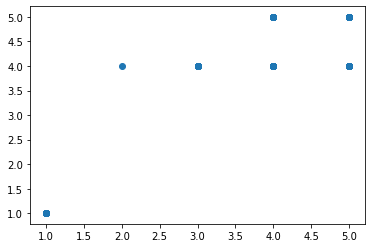

In [117]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_predict)
plt.show()

In [138]:
(mat/np.sum(mat,axis=0)*100).tolist()

[[100.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 100.0, 100.0, 90.8284023668639, 10.278840896664844],
 [0.0, 0.0, 0.0, 9.171597633136095, 89.72115910333515]]

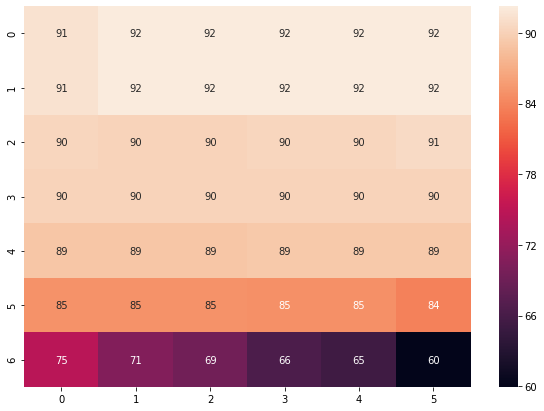

In [9]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

a = [[91.40346168, 92.21911404, 92.26080452, 92.26080452, 92.26080452, 92.26080452],      
 [91.40346168, 92.21911404, 92.21911404, 92.26080452, 92.26080452, 92.26080452],      
 [90.39093405, 90.22591301, 90.22591301, 90.44726418, 90.44726418, 90.79469481],      
 [90.23038778, 90.23038778, 90.23038778, 90.23038778, 90.23038778, 90.23038778],      
 [89.08229632, 89.08229632, 89.08229632, 89.24628444, 89.24628444, 89.24628444],      
 [85.02056686, 85.02056686, 85.02056686, 84.83999829, 84.83999829, 83.74462056],      
 [74.64496506, 70.58367076, 69.30646083, 66.46627183, 65.29786008, 59.94514113]] 
df_cm = pd.DataFrame(a)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [31]:
w_initial = np.zeros(28*5).reshape(28, 5)
# costAr = []
# costAr.append(np.inf)
k = 30
l = X_train.shape[0]
# index=0
# print(l/k)
for j in range(0, int(params[2])):
    for i in range(0,int(k)):
        startIndex = int((l/k)*i)
        endIndex = int((l/k)*(i+1))
        grad  = gradient(X_train[startIndex:endIndex,:] , Y_train[startIndex:endIndex,:], w_initial)
        w_initial = w_initial+params[1]*grad
        c = cost(w_initial,X_train[startIndex:endIndex,:],Y_train[startIndex:endIndex,:])
        print((startIndex,endIndex,j,i), end="\r", flush=True)
#             print(j,i,c)
        # if(costAr[index-1]-c<0):
        #     break
        # index+=1
        costAr.append(c)
        # w_initial = w_temp
                
            


KeyboardInterrupt: 

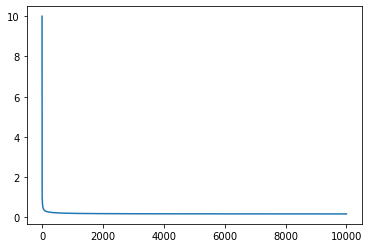

In [ ]:
batch30Error  = costAr

In [ ]:

WmulX = np.exp(np.matmul(X_test, w_initial))
denom = np.sum(WmulX, axis=1)
Y_predict = np.divide(WmulX, denom.reshape(len(test), 1))
b = np.zeros_like(Y_predict)
b[np.arange(len(Y_predict)), Y_predict.argmax(1)] = 1
Y_predict = b
Y_predict[:, 0] = 1*Y_predict[:, 0]
Y_predict[:, 1] = 2*Y_predict[:, 1]
Y_predict[:, 2] = 3*Y_predict[:, 2]
Y_predict[:, 3] = 4*Y_predict[:, 3]
Y_predict[:, 4] = 5*Y_predict[:, 4]
Y_predict = np.sum(Y_predict, axis=1).tolist()
predict = []
for i in range(0, len(Y_predict)):
    if(Y_predict[i] == 1):
        predict.append("not_recom")
    elif(Y_predict[i] == 2):
        predict.append("recommend")
    elif(Y_predict[i] == 3):
        predict.append("very_recom")
    elif(Y_predict[i] == 4):
        predict.append("priority")
    elif(Y_predict[i] == 5):
        predict.append("spec_prior")
Y_predict = pd.DataFrame(predict)
Y_predict.to_csv(sys.argv[4], header=False, index=False)
w_initial = pd.DataFrame(w_initial)
w_initial.to_csv(sys.argv[5], header=False, index=False)